In [14]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from main import get_args
from rxnscribe.dataset import ReactionDataset
from rxnscribe.tokenizer import get_tokenizer
import torchvision.transforms.functional as F

args = get_args(notebook=True)
args.format = 'coref'
args.pix2seq = True
args.data_path = '../data/coref/splits/annotations'
args.image_path = '../data/detect/images'
args.train_file = 'coref_redo_train.json'
args.num_train_example = None
args.augment = True
args.composite_augment = True
args.rand_order = False

tokenizer = get_tokenizer(args)
train_dataset = ReactionDataset(args, tokenizer, args.train_file, split='train', debug=True)

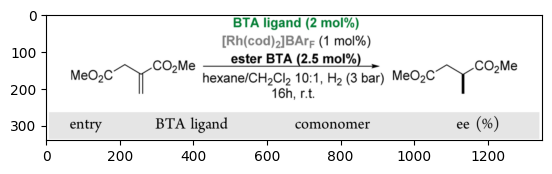

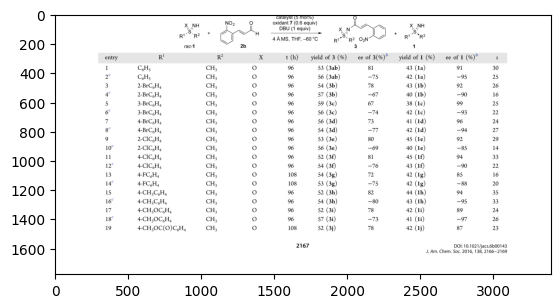

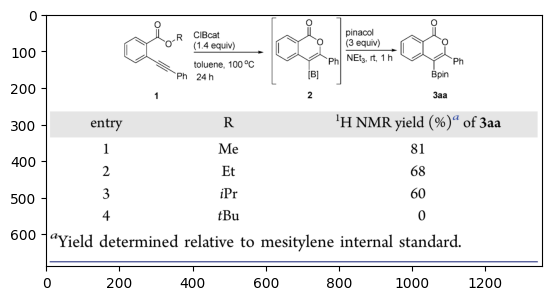

In [28]:
for i in range(3):
    image1, target1 = train_dataset.load_and_prepare(i)
    plt.figure()
    plt.imshow(image1)
    plt.show()

{'id': 1, 'width': 3396, 'height': 1776, 'file_name': 'jacs.6b00143-Table-c2.png', 'license': 0, 'bboxes': [{'id': 0, 'bbox': [2390.35, 60.38, 146.74, 112.34], 'category_id': 1}, {'id': 1, 'bbox': [1262.95, 198.63, 49.38, 36.4], 'category_id': 3}, {'id': 2, 'bbox': [878.06, 201.87, 81.18, 34.45], 'category_id': 3}, {'id': 3, 'bbox': [2443.58, 201.87, 28.61, 35.1], 'category_id': 3}, {'id': 4, 'bbox': [289.0, 259.21, 2816.1, 1237.18], 'category_id': 4}, {'id': 5, 'bbox': [1486.22, 2.61, 310.95, 118.83], 'category_id': 2}, {'id': 6, 'bbox': [1908.11, 9.1, 357.68, 188.28], 'category_id': 1}, {'id': 7, 'bbox': [1127.7, 41.51, 272.44, 171.58], 'category_id': 1}, {'id': 8, 'bbox': [848.15, 59.84, 146.35, 109.71], 'category_id': 1}, {'id': 9, 'bbox': [1483.62, 148.0, 319.39, 42.89], 'category_id': 2}, {'id': 10, 'bbox': [2043.11, 201.87, 27.96, 35.1], 'category_id': 3}], 'reactions': [{'reactants': [8, 7], 'conditions': [5, 9], 'products': [6, 0]}], 'corefs': [[8, 2], [7, 1], [6, 10], [0, 3]]

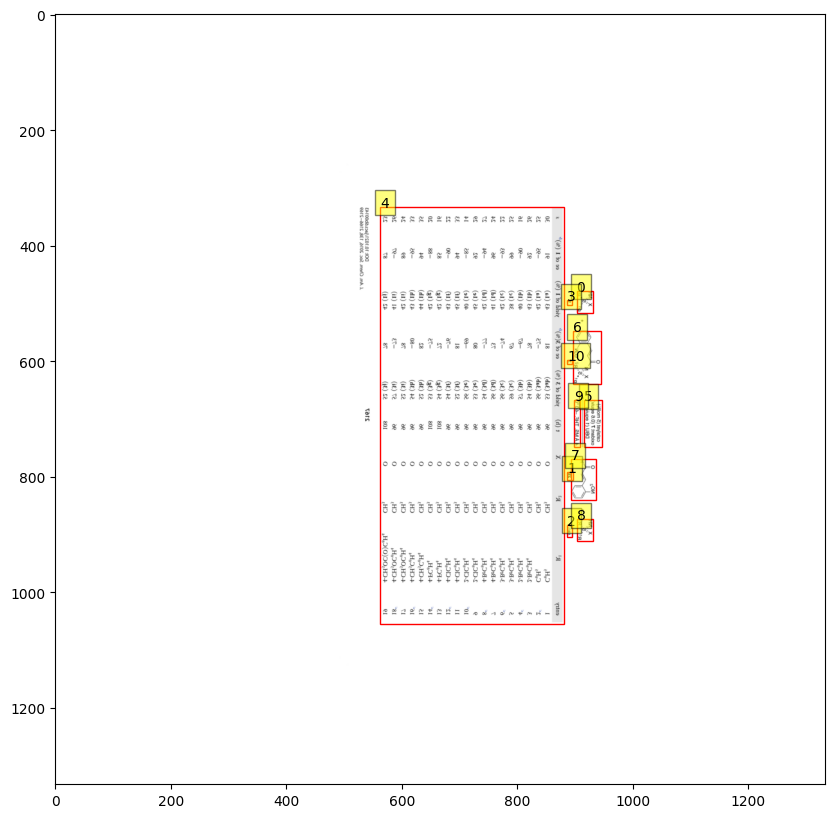

In [31]:
'''

image1, target1 = train_dataset.load_and_prepare(1)
print("image1")
print(target1)
image2, target2 = train_dataset.load_and_prepare(2)
print("image2")
print(target2)
image, target = train_dataset.concat(image1, target1, image2, target2)
image3, target3 = train_dataset.load_and_prepare(3)
image, target = train_dataset.concat(image, target, image3, target3)
image, target = train_dataset.transform(image, target)
print("final")
print(target)
'''
image1, target1 = train_dataset.load_and_prepare(1)
image, target = train_dataset.transform(image1, target1)
print(target)


_, h, w = image.size()
# print(image.size())
plt.figure(figsize=(10, 10))
plt.imshow(F.to_pil_image(image))
ax = plt.gca()
for i, bbox in enumerate(target['boxes']):
    if target['area'][i] == 0:
        continue
    xmin, ymin, xmax, ymax = bbox * np.array([w, h, w, h])
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='r', linewidth=1))
    ax.text(xmin, ymin, str(i), fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()
# print(target)


In [20]:
print(target.keys())

dict_keys(['image_id', 'orig_size', 'size', 'boxes', 'labels', 'area', 'reactions', 'scale'])


In [21]:
print(target['labels'])

tensor([3, 1, 3, 4, 3, 1, 1, 2, 3, 4, 2, 1, 1, 3, 1, 1, 3, 1, 2, 2, 1, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1])


In [6]:
print(train_dataset.transform)

Compose(
    Compose(
)
)


In [8]:
print(type(train_dataset.transform))

<class 'rxnscribe.transforms.Compose'>
